In [1]:
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
import numpy as np
import scipy.sparse as sparse
import optimization as o
def get_data():
    data = load_svmlight_file("real-sim.bz2")
    return data[0], data[1]

X, y = get_data()

In [2]:
X = sparse.hstack((np.ones((X.shape[0], 1)), X), 'csr')

In [24]:
import telepyth
%telepyth -t 2590348887396371489

Use token 2590348887396371489.


In [25]:
%telepyth 'done'

'done'

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=413)

C:\Users\User\conda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Experiement 1
______________________________________

In [5]:
import optimization as o
import time as t
FullBinary = o.GDClassifier('binary_logistic', step_alpha=1, step_beta=0, max_iter=10000, l2_coef=1e-5)
StohasticBinary = o.SGDClassifier('binary_logistic', step_alpha=1,
                                  batch_size=1, step_beta=0, max_iter=100000, l2_coef=1e-5, tolerance=1e-7)

In [6]:
time_startF = t.time()
history_full = FullBinary.fit(X_train, y_train, trace=True)
time_endF = t.time() - time_startF

In [71]:
time_start = t.time()
history_st = StohasticBinary.fit(X_train, y_train, trace=True, log_freq=0.01)
time_end = t.time() - time_start

In [72]:
history_st_rw = StohasticBinary.fit(X_train, y_train, np.random.rand(X_train.shape[1]),
                                    trace=True, log_freq=0.01)

In [9]:
print("Time of fitting Full:", time_endF)
print("Time of fitting stochastic:", time_end)


Time of fitting Full: 302.0796277523041
Time of fitting stochastic: 50.99553060531616


C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


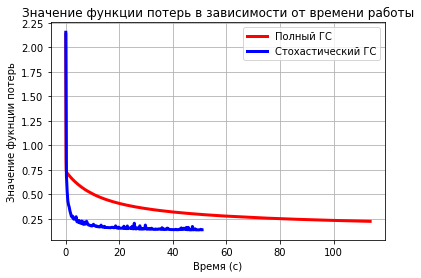

In [10]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

f, ax1 = plt.subplots()
ax1.plot(np.cumsum(history_full['time']), history_full['func'], 'r', label='Полный ГС', lw=3)
ax1.plot(np.cumsum(history_st['time']), history_st['func'], 'b', label='Стохастический ГС', lw=3)
ax1.set_title(u"Значение функции потерь в зависимости от времени работы")
ax1.set_ylabel(u"Значение фукнции потерь")
ax1.set_xlabel(u"Время (с)")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph1_1.pdf")
   

C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


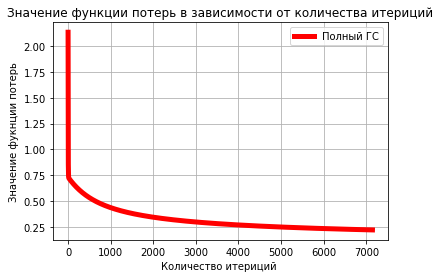

In [11]:
f, ax1 = plt.subplots()
ax1.plot(np.arange(0, len(history_full['func'])), history_full['func'], 'r', label='Полный ГС', lw=5)
ax1.set_title(u"Значение функции потерь в зависимости от количества итериций")
ax1.set_ylabel(u"Значение фукнции потерь")
ax1.set_xlabel(u"Количество итериций ")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph1_2a.pdf")
   

C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


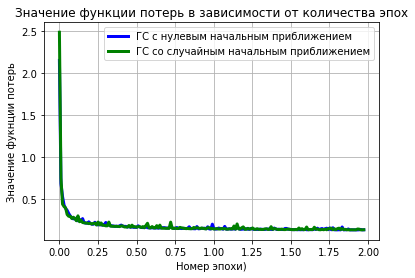

In [76]:
f, ax1 = plt.subplots()
ax1.plot(history_st['epoch_num'], history_st['func'], 'b',
         label='ГС c нулевым начальным приближением', lw=3)
ax1.plot(history_st_rw['epoch_num'], history_st_rw['func'], 'g-',
         label='ГС cо случайным начальным приближением', lw=3)
ax1.set_title(u"Значение функции потерь в зависимости от количества эпох")
ax1.set_ylabel(u"Значение фукнции потерь")
ax1.set_xlabel(u"Номер эпохи)")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph1_2b.pdf")

In [27]:
Full_Binary = o.GDClassifier('binary_logistic', step_alpha=1, step_beta=0, max_iter=5000, l2_coef=1e-5)
hf = Full_Binary.fit(X_train, y_train, trace=True, accuracy=True, Test=(X_test, y_test))
time_full = hf['time']
accuracy_full = Full_Binary.acc_list
    

In [28]:


StohasticBinary = o.SGDClassifier('binary_logistic', step_alpha=1, batch_size=1,
                                  step_beta=0, max_iter=100000, l2_coef=1e-5, tolerance=1e-5)
hs = StohasticBinary.fit(X_train, y_train, log_freq=0.1, trace=True, accuracy=True, Test=(X_test, y_test))
accuracy_st = StohasticBinary.acc_list
time_st = hs['time']
epoch = hs['epoch_num']
             
    

C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


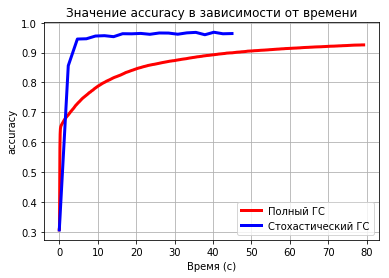

In [29]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

f, ax1 = plt.subplots()
ax1.plot(np.cumsum(time_full), accuracy_full, 'r', label='Полный ГС', lw=3)
ax1.plot(np.cumsum(time_st), accuracy_st, 'b', label='Стохастический ГС', lw=3)
ax1.set_title(u"Значение accuracy в зависимости от времени")
ax1.set_ylabel(u"accuracy")
ax1.set_xlabel(u"Время (с)")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph1_3.pdf")

C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


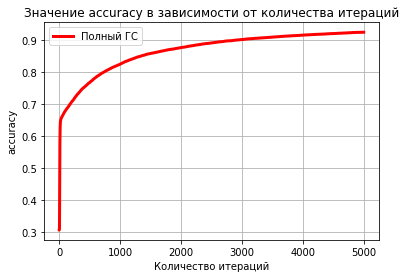

In [30]:
f, ax1 = plt.subplots()
ax1.plot(range(1, 5002), accuracy_full, 'r', label='Полный ГС', lw=3)
ax1.set_title(u"Значение accuracy в зависимости от количества итераций")
ax1.set_ylabel(u"accuracy")
ax1.set_xlabel(u"Количество итераций")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph1_4a.pdf")

C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


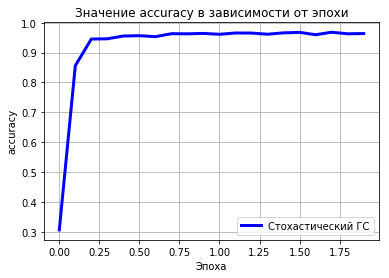

In [31]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

f, ax1 = plt.subplots()
ax1.plot(epoch, accuracy_st, 'b', label='Стохастический ГС', lw=3)
ax1.set_title(u"Значение accuracy в зависимости от эпохи")
ax1.set_ylabel(u"accuracy")
ax1.set_xlabel(u"Эпоха")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph1_4b.pdf")

## Experiement 2
_____________________________

In [32]:
list_alpha = [0.1, 1, 100, 1000]
acc_full = {}

loss_full = {}

time_full = {}

for alpha in list_alpha:
    FB = o.GDClassifier('binary_logistic', step_alpha=alpha, step_beta=0, max_iter=10000, l2_coef=1e-5)
    hf = FB.fit(X_train, y_train, trace=True, accuracy=True, Test=(X_test, y_test))
    time_full[alpha] = hf['time']
    loss_full[alpha] = hf['func']
    acc_full[alpha] = FB.acc_list

In [138]:
time_st = {}
loss_st = {}
acc_st = {}
for alpha in list_alpha:
    SB = o.SGDClassifier('binary_logistic', step_alpha=alpha, batch_size=1,
                                  step_beta=0, max_iter=100000, l2_coef=1e-5, tolerance=1e-5)
    hs = SB.fit(X_train, y_train, log_freq=0.05,
                             trace=True, accuracy=True, Test=(X_test, y_test))
    time_st[alpha] = hs['time']
    loss_st[alpha] = hs['func']
    acc_st[alpha] = SB.acc_list

C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


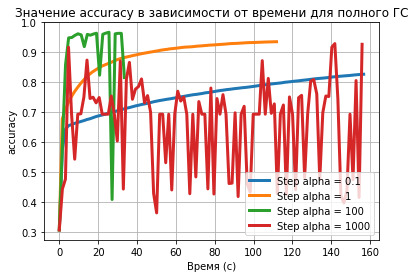

In [42]:
f, ax1 = plt.subplots()
for alpha in list_alpha:
    ax1.plot(np.cumsum(time_full[alpha])[::100], acc_full[alpha][::100], label='Step alpha = ' + str(alpha), lw=3)
ax1.set_title(u"Значение accuracy в зависимости от времени для полного ГС")
ax1.set_ylabel(u"accuracy")
ax1.set_xlabel(u"Время (с)")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph2_1.pdf")

C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


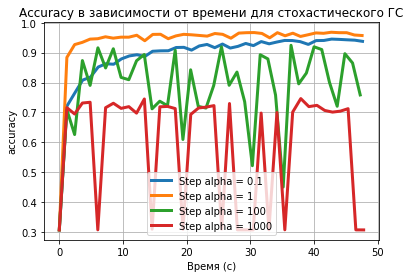

In [139]:
f, ax1 = plt.subplots()
for alpha in list_alpha:
    ax1.plot(np.cumsum(time_st[alpha]), acc_st[alpha], label='Step alpha = ' + str(alpha), lw=3)
ax1.set_title(u"Accuracy в зависимости от времени для стохастического ГС")
ax1.set_ylabel(u"accuracy")
ax1.set_xlabel(u"Время (с)")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph2_2.pdf")

C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


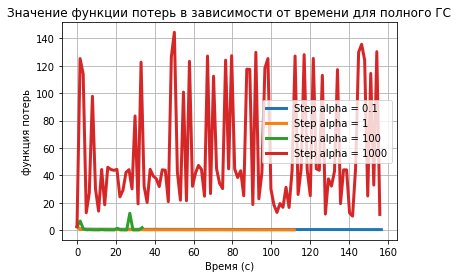

In [55]:
f, ax1 = plt.subplots()
for alpha in list_alpha:
    ax1.plot(np.cumsum(time_full[alpha])[::100], loss_full[alpha][::100],  label='Step alpha = ' + str(alpha), lw=3)
ax1.set_title(u"Значение функции потерь в зависимости от времени для полного ГС")
ax1.set_ylabel(u"функция потерь")
ax1.set_xlabel(u"Время (с)")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph2_3.pdf")

C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


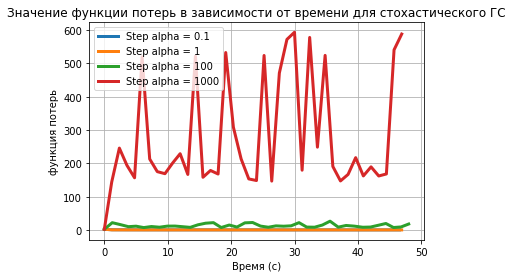

In [67]:
f, ax1 = plt.subplots()
for alpha in list_alpha:
    ax1.plot(np.cumsum(time_st[alpha]), loss_st[alpha], label='Step alpha = ' + str(alpha), lw=3)
ax1.set_title(u"Значение функции потерь в зависимости от времени для стохастического ГС")
ax1.set_ylabel(u"функция потерь")
ax1.set_xlabel(u"Время (с)")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph2_4.pdf")

In [ ]:
%telepyth 'done'

In [89]:

list_beta = [0, 0.5, 1, 2, 4]
for beta in list_beta:
    FB = o.GDClassifier('binary_logistic', step_alpha=1, step_beta=beta, max_iter=10000, l2_coef=1e-5)
    hf = FB.fit(X_train, y_train, trace=True, accuracy=True, Test=(X_test, y_test))
    time_full[beta] = hf['time']
    loss_full[beta] = hf['func']
    acc_full[beta] = FB.acc_list

In [140]:

list_beta = [0, 0.5, 1, 2, 4]
epoch = {}
for beta in list_beta:
    SB = o.SGDClassifier('binary_logistic', step_alpha=1, batch_size=1,
                                  step_beta=beta, max_iter=100000, l2_coef=1e-5, tolerance=1e-5)
    hs = SB.fit(X_train, y_train, log_freq=0.05,
                             trace=True, accuracy=True, Test=(X_test, y_test))
    time_st[beta] = hs['time']
    loss_st[beta] = hs['func']
    acc_st[beta] = SB.acc_list
    epoch[beta] = hs['epoch_num']

C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


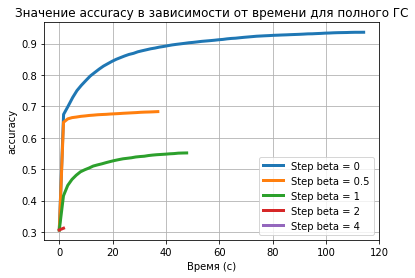

In [91]:
f, ax1 = plt.subplots()
for beta in list_beta:
    ax1.plot(np.cumsum(time_full[beta])[::100], acc_full[beta][::100], label='Step beta = ' + str(beta), lw=3)
ax1.set_title(u"Значение accuracy в зависимости от времени для полного ГС")
ax1.set_ylabel(u"accuracy")
ax1.set_xlabel(u"Время (с)")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph2_5.pdf")

C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


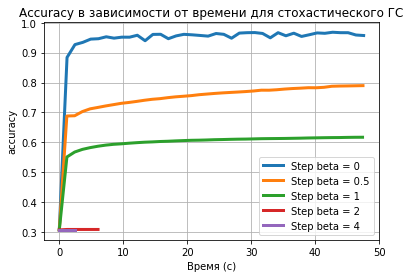

In [141]:
f, ax1 = plt.subplots()
for beta in list_beta:
    ax1.plot(np.cumsum(time_st[beta]), acc_st[beta], label='Step beta = ' + str(beta), lw=3)
ax1.set_title(u"Accuracy в зависимости от времени для стохастического ГС")
ax1.set_ylabel(u"accuracy")
ax1.set_xlabel(u"Время (с)")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph2_6.pdf")

C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


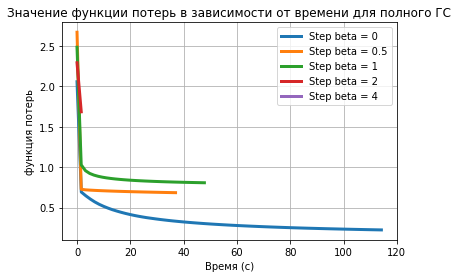

In [93]:
f, ax1 = plt.subplots()
for beta in list_beta:
    ax1.plot(np.cumsum(time_full[beta])[::100], loss_full[beta][::100], label='Step beta = ' + str(beta), lw=3)
ax1.set_title(u"Значение функции потерь в зависимости от времени для полного ГС")
ax1.set_ylabel(u"функция потерь")
ax1.set_xlabel(u"Время (с)")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph2_7.pdf")

C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


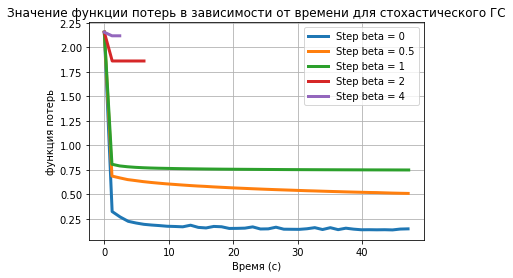

In [94]:
f, ax1 = plt.subplots()
for beta in list_beta:
    ax1.plot(np.cumsum(time_st[beta]), loss_st[beta], label='Step beta = ' + str(beta), lw=3)
ax1.set_title(u"Значение функции потерь в зависимости от времени для стохастического ГС")
ax1.set_ylabel(u"функция потерь")
ax1.set_xlabel(u"Время (с)")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph2_8.pdf")

In [136]:
for beta in list_beta:
    s = (str(beta) + '&' + str(len(time_full[beta])) + '&' + str(np.cumsum(time_full[beta])[-1]) +
         '&' + str(acc_full[beta][-1]) + '&' + str(loss_full[beta][-1]) + '&' + str(epoch[beta][-1])
         + '&' + str(np.cumsum(time_st[beta])[-1]) + '&' + str(acc_st[beta][-1]) 
         + '&' + str(loss_st[beta][-1]) + '\\')
    print(s)

0&7149&114.943124533&0.936477204628&0.222552395504&1.950154101467716&47.5360865593&0.957359516895&0.14692377958\
0.5&2392&38.4167337418&0.684137740285&0.683024916455&1.950154101467716&47.7030558586&0.789655649288&0.508335938691\
1&3018&48.0522112846&0.552159682847&0.806516695333&1.950154101467716&47.7531149387&0.616881021528&0.747602270085\
2&178&2.81132650375&0.31208223851&1.68343406588&0.2500197565986493&6.11278939247&0.308210021666&1.85949296794\
4&15&0.225984811783&0.30668879362&2.08357388967&0.1000079026394848&2.42931056023&0.30668879362&2.11650356902\


In [142]:
alpha = 100 
list_beta = [0, 0.5, 1, 2, 4]
for beta in list_beta:
    FB = o.GDClassifier('binary_logistic', step_alpha=alpha, step_beta=beta, max_iter=10000, l2_coef=1e-5)
    hf = FB.fit(X_train, y_train, trace=True, accuracy=True, Test=(X_test, y_test))
    time_full[beta] = hf['time']
    loss_full[beta] = hf['func']
    acc_full[beta] = FB.acc_list

In [143]:
epoch = {}
for beta in list_beta:
    SB = o.SGDClassifier('binary_logistic', step_alpha=1, batch_size=1,
                                  step_beta=beta, max_iter=100000, l2_coef=1e-5, tolerance=1e-5)
    hs = SB.fit(X_train, y_train, log_freq=0.05,
                             trace=True, accuracy=True, Test=(X_test, y_test))
    time_st[beta] = hs['time']
    loss_st[beta] = hs['func']
    acc_st[beta] = SB.acc_list
    epoch[beta] = hs['epoch_num']

C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


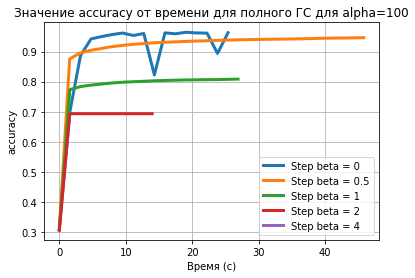

In [144]:
f, ax1 = plt.subplots()
for beta in list_beta:
    ax1.plot(np.cumsum(time_full[beta])[::100], acc_full[beta][::100], label='Step beta = ' + str(beta), lw=3)
ax1.set_title(u"Значение accuracy от времени для полного ГС для alpha=100")
ax1.set_ylabel(u"accuracy")
ax1.set_xlabel(u"Время (с)")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph2_alpha=100.pdf")

C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


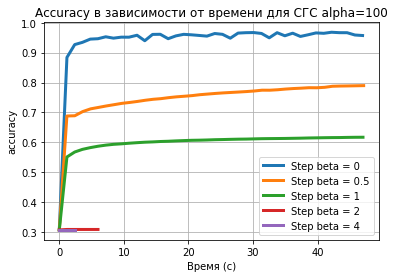

In [145]:
f, ax1 = plt.subplots()
for beta in list_beta:
    ax1.plot(np.cumsum(time_st[beta]), acc_st[beta], label='Step beta = ' + str(beta), lw=3)
ax1.set_title(u"Accuracy в зависимости от времени для СГС alpha=100")
ax1.set_ylabel(u"accuracy")
ax1.set_xlabel(u"Время (с)")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph2_alpha=100_2.pdf")

In [146]:
%telepyth 'done'

'done'

## Experiement 3 
____________________________

In [168]:
list_seed = [113563, 2071, 490, 3]
time_st = {}
loss_st = {}
acc_st = {}
epoch = {}
for seed in list_seed:
    SB = o.SGDClassifier('binary_logistic', step_alpha=1, batch_size=1, 
                         step_beta=0, max_iter=100000, l2_coef=1e-5,
                         tolerance=1e-5, random_seed=seed)
    hs = SB.fit(X_train, y_train, log_freq=0.05,
                trace=True, accuracy=True, Test=(X_test, y_test))
    time_st[seed] = hs['time']
    loss_st[seed] = hs['func']
    epoch[seed] = hs['epoch_num']
    acc_st[seed] = SB.acc_list

C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


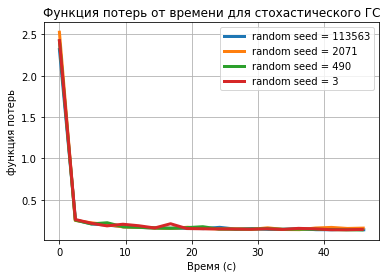

In [169]:
f, ax1 = plt.subplots()
for seed in list_seed:
    ax1.plot(np.cumsum(time_st[seed])[::2], loss_st[seed][::2], label='random seed = ' + str(seed), lw=3)
ax1.set_title(u"Функция потерь от времени для стохастического ГС")
ax1.set_ylabel(u"функция потерь")
ax1.set_xlabel(u"Время (с)")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph3_1.pdf")

C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


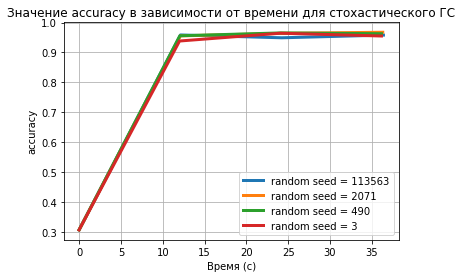

In [170]:
f, ax1 = plt.subplots()
for seed in list_seed:
    ax1.plot(np.cumsum(time_st[seed])[::10], acc_st[seed][::10], label='random seed = ' + str(seed), lw=3)
ax1.set_title(u"Значение accuracy в зависимости от времени для стохастического ГС")
ax1.set_ylabel(u"accuracy")
ax1.set_xlabel(u"Время (с)")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph3_2.pdf")

In [171]:
for seed in list_seed:
    s = (str(seed)  + '&' + str(epoch[seed][-1])
         + '&' + str(np.cumsum(time_st[seed])[-1]) + '&' + str(acc_st[seed][-1]) 
         + '&' + str(loss_st[seed][-1]) + '\\')
    print(s)

113563&1.950154101467716&47.2360475063&0.968054211036&0.135303017066\
2071&1.950154101467716&47.1579926014&0.961923201033&0.147302912366\
490&1.950154101467716&46.9800670147&0.96759323284&0.139258542429\
3&1.950154101467716&46.9960174561&0.962752961785&0.140605935177\


In [166]:
%debug

> <ipython-input-165-121d822502ae>(4)<module>()
      1 for seed in list_seed:
      2     s = (str(seed)  + '&' + str(epoch[seed][-1])
      3          + '&' + str(np.cumsum(time_st[seed])[-1]) + '&' + str(acc_st[seed][-1])
----> 4          + '&' + str(loss_st[seed][-1]) + '\\')
      5     print(s)

ipdb> loss_st.keys()
dict_keys([113563, 2071, 490, 3])
ipdb> loss_st[seed]
[2.3159185203896402, 0.33452914970905001, 0.2552360210144774, 0.2344333568982771, 0.20796285705824163, 0.19309949427196421, 0.1935941356298132, 0.18081934665673868, 0.17374978554767856, 0.17118906259968139, 0.16571019532098497, 0.16152472509412158, 0.15826784923942525, 0.15607501729681184, 0.15569399677841292, 0.16104033675256468, 0.15610709110801271, 0.1495493226599863, 0.15141770946274688, 0.14699573719806275, 0.16685701914873108, 0.15007419594953073, 0.14485359000886386, 0.14647398933681943, 0.15163885746921241, 0.14162496065319929, 0.14263307023749536, 0.14779974316426769, 0.14311065496187789, 0.146462184120389

## Experiement 4
________________________

In [21]:
list_batch = [1, 5, 10, 20, 50, 100]
time_st = {}
loss_st = {}
acc_st = {}
epoch = {}
lf = 0.1
for batch in list_batch:
    SB = o.SGDClassifier('binary_logistic', step_alpha=1, batch_size=batch, 
                         step_beta=0, max_iter=100000, l2_coef=1e-5,
                         tolerance=1e-5)
    hs = SB.fit(X_train, y_train, log_freq=lf,
                trace=True, accuracy=True, Test=(X_test, y_test))
    lf = 0.5
    time_st[batch] = hs['time']
    loss_st[batch] = hs['func']
    acc_st[batch] = SB.acc_list
    epoch[batch] = hs['epoch_num']

C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


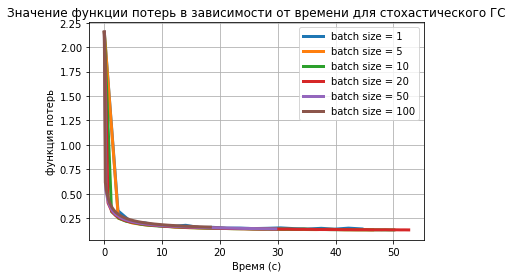

In [22]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

f, ax1 = plt.subplots()
for batch in list_batch:
    ax1.plot(np.cumsum(time_st[batch]), loss_st[batch], label='batch size = ' + str(batch), lw=3)
ax1.set_title(u"Значение функции потерь в зависимости от времени для стохастического ГС")
ax1.set_ylabel(u"функция потерь")
ax1.set_xlabel(u"Время (с)")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph4_1.pdf")

C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


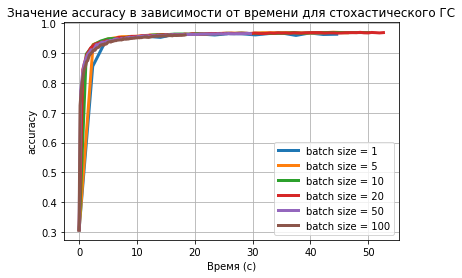

In [23]:
f, ax1 = plt.subplots()
for batch in list_batch:
    ax1.plot(np.cumsum(time_st[batch]), acc_st[batch], label='batch size = ' + str(batch), lw=3)
ax1.set_title(u"Значение accuracy в зависимости от времени для стохастического ГС")
ax1.set_ylabel(u"accuracy")
ax1.set_xlabel(u"Время (с)")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph4_2.pdf")

C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


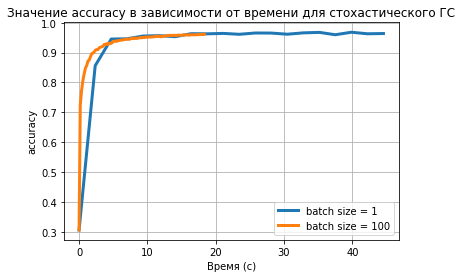

In [24]:
f, ax1 = plt.subplots()
for batch in [1, 100]:
    ax1.plot(np.cumsum(time_st[batch]), acc_st[batch], label='batch size = ' + str(batch), lw=3)
ax1.set_title(u"Значение accuracy в зависимости от времени для стохастического ГС")
ax1.set_ylabel(u"accuracy")
ax1.set_xlabel(u"Время (с)")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph4_3.pdf")

C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


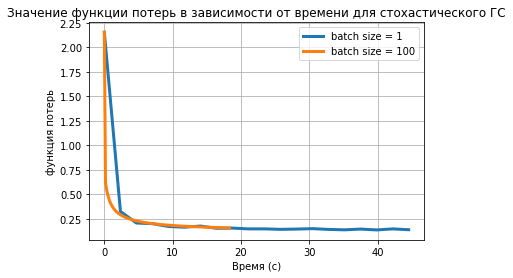

In [28]:
f, ax1 = plt.subplots()
for batch in [1, 100]:
    ax1.plot(np.cumsum(time_st[batch]), loss_st[batch], label='batch size = ' + str(batch), lw=3)
ax1.set_title(u"Значение функции потерь в зависимости от времени для стохастического ГС")
ax1.set_ylabel(u"функция потерь")
ax1.set_xlabel(u"Время (с)")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph4_4.pdf")

In [26]:
for batch in list_batch:
    s = (str(batch)  + '&' + str(epoch[batch][-1])
         + '&' + str(np.cumsum(time_st[batch])[-1]) + '&' + str(acc_st[batch][-1]) 
         + '&' + str(loss_st[batch][-1]) + '&' + str(int(epoch[batch][-1] * X_train.shape[0] / batch )) + '\\')
    print(s)

1&1.9001501501481408&44.556650877&0.963721015996&0.139648109046&96177\
5&9.50075075076648&46.4008944035&0.96865348269&0.130723797303&96178\
10&19.501541014732084&50.0733041763&0.969298852164&0.129949425816&98709\
20&39.018492176453314&52.6366887093&0.969206656525&0.12977900596&98748\
50&48.079658605966785&29.6577756405&0.965518830959&0.140708348364&48671\
100&49.67994310098822&18.3383321762&0.961370027198&0.158599612121&25145\


In [27]:
%telepyth 'done'

'done'

## Experiement 5

Для визуализации в качестве примера использовалось http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html
____________________________

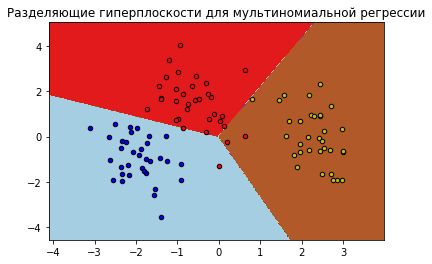

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

%matplotlib inline
import optimization as o
import multiclass as m
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=100, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)
X_f= np.hstack((np.zeros((X.shape[0], 1)), X))
Multi = o.GDClassifier('multinomial_logistic', step_alpha=1, step_beta=0, max_iter=10000, l2_coef=1e-5)
hm = Multi.fit(X_f,y, trace=True)

h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = Multi.predict(np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.title("Разделяющие гиперплоскости для мультиномиальной регрессии")
plt.axis('tight')
colors = "bry"
for i, color in zip([0, 1, 2], colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor='black', s=20)
plt.savefig("graph5_1.pdf")

In [99]:
np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()]

array([[ 1.        , -1.        , -4.10025948],
       [ 1.        , -0.98      , -4.10025948],
       [ 1.        , -0.96      , -4.10025948],
       ..., 
       [ 1.        ,  0.94      ,  3.97974052],
       [ 1.        ,  0.96      ,  3.97974052],
       [ 1.        ,  0.98      ,  3.97974052]])

In [22]:
X_test, y_test = make_blobs(n_samples=30, centers=centers, random_state=40)
(Multi.predict(X_test) == y_test).sum() / X_test.shape[0]

0.93333333333333335

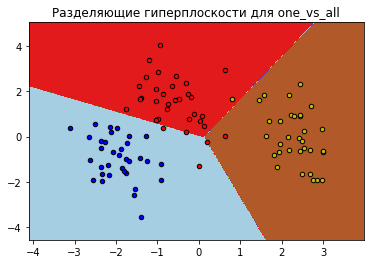

In [103]:
import time as t
OvA = m.MulticlassStrategy(o.GDClassifier, 'one_vs_all', loss_function='binary_logistic',
                           step_alpha=1, step_beta=0, max_iter=10000, l2_coef=1e-5)
ts = t.time()

t_end_ova = t.time() - ts
X_f= np.hstack((np.zeros((X.shape[0], 1)), X))
OvA.fit(X_f, y)
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = OvA.predict(np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.title("Разделяющие гиперплоскости для one_vs_all")
plt.axis('tight')
colors = "bry"
for i, color in zip([0, 1, 2], colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor='black', s=20)
plt.savefig("graph5_2.pdf")

In [104]:
(OvA.predict(X_test) == y_test).sum() / y_test.shape[0]

ValueError: dimension mismatch

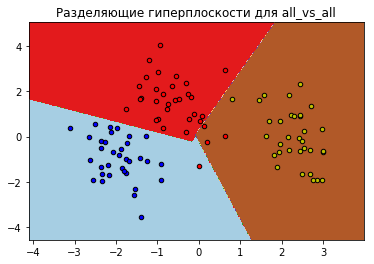

In [106]:
AvA = m.MulticlassStrategy(o.GDClassifier, 'all_vs_all', loss_function='binary_logistic',
                           step_alpha=1, step_beta=0, max_iter=10000, l2_coef=1e-5)
ts = t.time()
X_f= np.hstack((np.zeros((X.shape[0], 1)), X))
AvA.fit(X_f, y)
t_end_ova = t.time() - ts
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = AvA.predict(np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.title("Разделяющие гиперплоскости для all_vs_all")
plt.axis('tight')
colors = "bry"
for i, color in zip([0, 1, 2], colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor='black', s=20)
plt.savefig("graph5_3.pdf")

## Experiement 6
__________________________

In [3]:
from sklearn.datasets import fetch_20newsgroups
import re
dataset = fetch_20newsgroups(subset='train',remove=('headers', 'footers' 'quotes'),
                             shuffle=True, random_state=42)

In [4]:
reg = re.compile('[^a-zA-Z0-9 ]')

for i in range(0, len(dataset.data)):
    dataset.data[i] = dataset.data[i].lower()
    dataset.data[i] = reg.sub(' ', dataset.data[i])
    dataset.data[i] = re.sub(r'\s+',' ', dataset.data[i])

## Experiement 7
_________________________

In [5]:
import time as t
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
t0 = t.time()
data = vectorizer.fit_transform(dataset.data)
vocabulary = vectorizer.vocabulary_
target = dataset.target


## Expreriement 8
__________________________

In [7]:
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
import numpy as np
import scipy.sparse as sparse
import optimization as o
import matplotlib.pyplot as plt
import numpy as np
import optimization as o
from sklearn.feature_extraction.text import TfidfTransformer
%matplotlib inline

TFIDF = TfidfTransformer()
data = TFIDF.fit_transform(data)
data = sparse.hstack((np.ones((data.shape[0], 1)), data), 'csr')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.8, random_state=413)

C:\Users\User\conda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [8]:
time_st = {}
loss_st = {}
list_alpha = [0.5, 1, 10, 20, 50, 100]
for alpha in list_alpha:
    S = o.SGDClassifier('multinomial_logistic', step_alpha=alpha, batch_size=10,
                                  step_beta=0, max_iter=500, l2_coef=1e-5, tolerance=1e-5)
    hs = S.fit(X_train, y_train, log_freq=0.1,
                             trace=True)
    time_st[alpha] = hs['time']
    loss_st[alpha] = hs['func']
    print("ok ", alpha)

ok  0.5
ok  1
ok  10
ok  20
ok  50
ok  100


C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


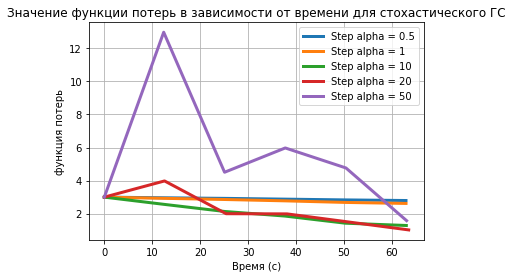

In [11]:
f, ax1 = plt.subplots()
for alpha in [0.5, 1, 10, 20, 50]:
    ax1.plot(np.cumsum(time_st[alpha]), loss_st[alpha], label='Step alpha = ' + str(alpha), lw=3)
ax1.set_title(u"Значение функции потерь в зависимости от времени для стохастического ГС")
ax1.set_ylabel(u"функция потерь")
ax1.set_xlabel(u"Время (с)")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph8_1.pdf")

In [70]:
SB = o.SGDClassifier('multinomial_logistic', step_alpha=10, batch_size=10,
                                  step_beta=0, max_iter=1000, l2_coef=1e-5, tolerance=1e-5)

C:\Users\User\conda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [13]:
list_batch = [1, 5, 10, 50, 100, 500]
time_st = {}
loss_st = {}
lf = 0.1
for batch in list_batch:
    SB1 = o.SGDClassifier('multinomial_logistic', step_alpha=10, batch_size=batch, 
                         step_beta=0, max_iter=300, l2_coef=1e-5,
                         tolerance=1e-5)
    hs = SB1.fit(X_train, y_train, log_freq=lf,
                trace=True)
    lf = 0.5
    time_st[batch] = hs['time']
    loss_st[batch] = hs['func']
    print("ok", batch)

ok 1
ok 5
ok 10
ok 50
ok 100
ok 500


C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


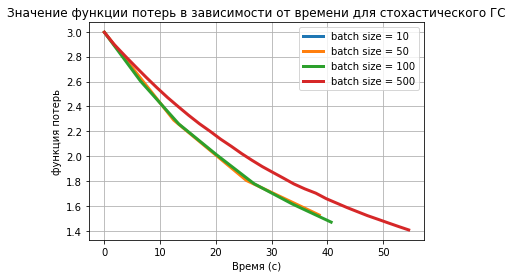

In [17]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

f, ax1 = plt.subplots()
for batch in [10,50,100,500]:
    ax1.plot(np.cumsum(time_st[batch]), loss_st[batch], label='batch size = ' + str(batch), lw=3)
ax1.set_title(u"Значение функции потерь в зависимости от времени для стохастического ГС")
ax1.set_ylabel(u"функция потерь")
ax1.set_xlabel(u"Время (с)")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph8_2.pdf")

In [18]:
list_beta = [0, 0.1, 0.5, 1, 2]
for beta in list_beta:
    SB1 = o.SGDClassifier('multinomial_logistic', step_alpha=1, batch_size=50,
                                  step_beta=beta, max_iter=1000, l2_coef=1e-5, tolerance=1e-5)
    hs = SB1.fit(X_train, y_train, log_freq=0.1,
                             trace=True, accuracy=True, Test=(X_test, y_test))
    time_st[beta] = hs['time']
    loss_st[beta] = hs['func']

C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


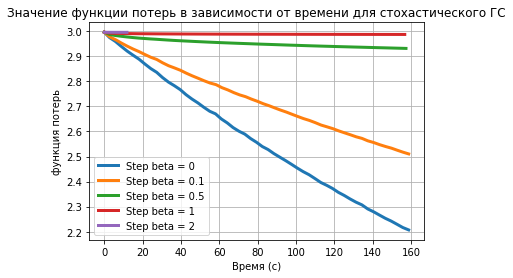

In [19]:
f, ax1 = plt.subplots()
for beta in list_beta:
    ax1.plot(np.cumsum(time_st[beta]), loss_st[beta], label='Step beta = ' + str(beta), lw=3)
ax1.set_title(u"Значение функции потерь в зависимости от времени для стохастического ГС")
ax1.set_ylabel(u"функция потерь")
ax1.set_xlabel(u"Время (с)")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph8_3.pdf")

In [29]:
import telepyth
%telepyth -t 2590348887396371489
%telepyth 'done'

Use token 2590348887396371489.


'done'

In [27]:
list_iter = [2000, 5000, 10000, 15000, 20000, 25000]
for it in list_iter:
    SB = o.SGDClassifier('multinomial_logistic', step_alpha=1, batch_size=100,
                                  step_beta=0, max_iter=it, l2_coef=1e-5, tolerance=1e-5)
    hs = SB.fit(X_train, y_train, log_freq=0.3,
                             trace=True)
    time_st[it] = hs['time']
    loss_st[it] = hs['func']

C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


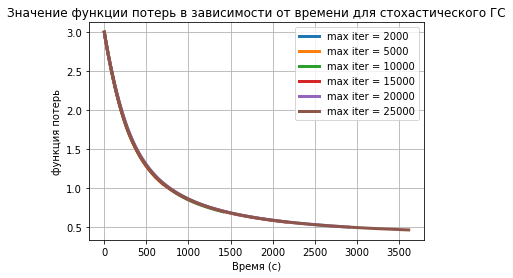

In [31]:
f, ax1 = plt.subplots()
for it in list_iter:
    ax1.plot(np.cumsum(time_st[it]), loss_st[it], label='max iter = ' + str(it), lw=3)
ax1.set_title(u"Значение функции потерь в зависимости от времени для стохастического ГС")
ax1.set_ylabel(u"функция потерь")
ax1.set_xlabel(u"Время (с)")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph8_4.pdf")

C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


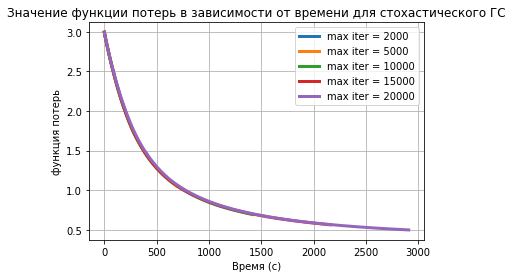

In [32]:
f, ax1 = plt.subplots()
for it in [2000, 5000, 10000, 15000, 20000]:
    ax1.plot(np.cumsum(time_st[it]), loss_st[it], label='max iter = ' + str(it), lw=3)
ax1.set_title(u"Значение функции потерь в зависимости от времени для стохастического ГС")
ax1.set_ylabel(u"функция потерь")
ax1.set_xlabel(u"Время (с)")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph8_4a.pdf")

C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


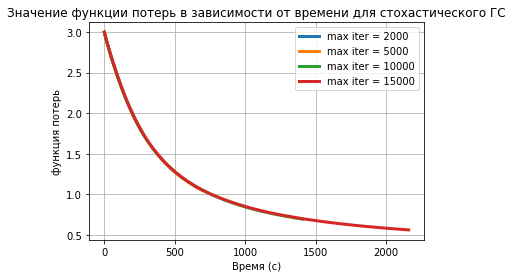

In [33]:
f, ax1 = plt.subplots()
for it in [2000, 5000, 10000, 15000]:
    ax1.plot(np.cumsum(time_st[it]), loss_st[it], label='max iter = ' + str(it), lw=3)
ax1.set_title(u"Значение функции потерь в зависимости от времени для стохастического ГС")
ax1.set_ylabel(u"функция потерь")
ax1.set_xlabel(u"Время (с)")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph8_4b.pdf")

In [20]:
epoch_ST_AC = {}
ACC_ST = {}
SB = o.SGDClassifier('multinomial_logistic', step_alpha=10, batch_size=100,
                              step_beta=0, max_iter=30000, l2_coef=1e-5, tolerance=1e-5)
hs = SB.fit(X_train, y_train, log_freq=0.3,
                            trace=True, accuracy=True, Test=(X_test, y_test))
ACC_ST = SB.acc_list
epoch_ST_AC = hs['epoch_num']
time_st = hs['time']
loss_st = hs['func']

C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


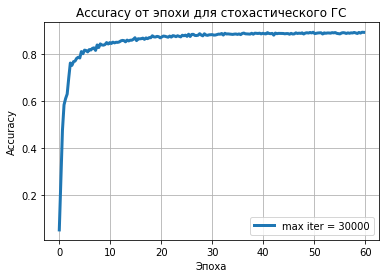

In [24]:
f, ax1 = plt.subplots()
ax1.plot(epoch_ST_AC, ACC_ST, label="max iter = 30000", lw=3)
ax1.set_title(u"Accuracy от эпохи для стохастического ГС")
ax1.set_ylabel(u"Accuracy")
ax1.set_xlabel(u"Эпоха")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph8_4acc.pdf")

C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


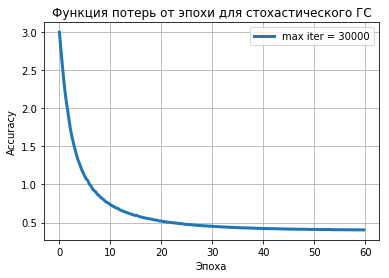

In [22]:
f, ax1 = plt.subplots()
ax1.plot(epoch_ST_AC, loss_st, label="max iter = 30000", lw=3)
ax1.set_title(u"Функция потерь от эпохи для стохастического ГС")
ax1.set_ylabel(u"Accuracy")
ax1.set_xlabel(u"Эпоха")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph8_4loss.pdf")

In [33]:
list_l2 = [1e-7,1e-6, 1e-5, 1e-4]
acc = {}
for l2 in list_l2:
    SB = o.SGDClassifier('multinomial_logistic', step_alpha=1, batch_size=100,
                                  step_beta=0, max_iter=1500, l2_coef=l2, tolerance=1e-5)
    hs = SB.fit(X_train, y_train)
    acc[l2] = (SB.predict(X_test) == y_test).sum() / X_test.shape[0]


KeyboardInterrupt: 

C:\Users\User\conda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


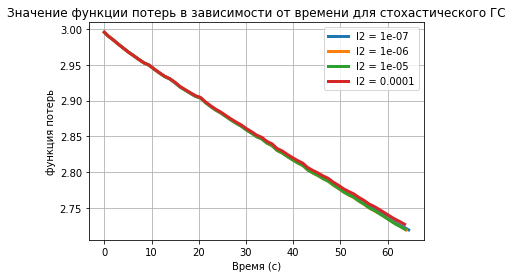

In [28]:
f, ax1 = plt.subplots()
for l2 in list_l2:
    ax1.plot(np.cumsum(time_st[l2]), loss_st[l2], label='l2 = ' + str(l2), lw=3)
ax1.set_title(u"Значение функции потерь в зависимости от времени для стохастического ГС")
ax1.set_ylabel(u"функция потерь")
ax1.set_xlabel(u"Время (с)")
ax1.grid()
ax1.legend()


f.show()
plt.savefig("graph8_5.pdf")

In [23]:
X_train.shape

(9051, 121590)

In [30]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
import optimization as o
import re
dataset = fetch_20newsgroups(subset='train',remove=('headers', 'footers' 'quotes'),
                             shuffle=True, random_state=42)
reg = re.compile('[^a-zA-Z0-9 ]')

for i in range(0, len(dataset.data)):
    dataset.data[i] = dataset.data[i].lower()
    dataset.data[i] = reg.sub(' ', dataset.data[i])
    dataset.data[i] = re.sub(r'\s+',' ', dataset.data[i])
import time as t
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
t0 = t.time()
data = vectorizer.fit_transform(dataset.data)
data = sparse.hstack((np.ones((data.shape[0], 1)), data), 'csr')
vocabulary = vectorizer.vocabulary_
target = dataset.target
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.8, random_state=413)
SB = o.SGDClassifier('multinomial_logistic', step_alpha=10, batch_size=100,
                                  step_beta=0, max_iter=3000, l2_coef=1e-5, tolerance=1e-5)
import time as t
ts = t.time()
SB.fit(X_train, y_train)
t_end = t.time() - ts
acc1 = (SB.predict(X_test) == y_test).sum() / X_test.shape[0]
print("time:",t_end," acc: ", acc1 )

C:\Users\User\conda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


time: 436.3394401073456  acc:  0.795846221829


In [31]:
from sklearn.feature_extraction.text import TfidfTransformer
TFIDF = TfidfTransformer()
data = TFIDF.fit_transform(data)
data = sparse.hstack((np.ones((data.shape[0], 1)), data), 'csr')
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.8, random_state=413)
ts = t.time()
SB.fit(X_train, y_train)
t_end2 = t.time() - ts
acc2 = (SB.predict(X_test) == y_test).sum() / X_test.shape[0]
print("time:",t_end2," acc: ", acc2 )

C:\Users\User\conda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


time: 425.13206243515015  acc:  0.888643393725


In [32]:
%telepyth 'done'

ERROR:root:Line magic function `%telepyth` not found.


In [ ]:
%telepyth acc2

In [ ]:
%telepyth 'done'

In [35]:
Best_cl = o.SGDClassifier('multinomial_logistic', step_alpha=10, batch_size=100,
                                  step_beta=0, max_iter=3000, l2_coef=1e-5, tolerance=1e-5)

## Experiement 9
_______________________

In [45]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
import optimization as o
import re
import scipy.sparse as sparse
from sklearn.feature_extraction.text import TfidfTransformer
import time as t
dataset = fetch_20newsgroups(subset='train',remove=('headers', 'footers' 'quotes'),
                             shuffle=True, random_state=42)
reg = re.compile('[^a-zA-Z0-9 ]')

for i in range(0, len(dataset.data)):
    dataset.data[i] = dataset.data[i].lower()
    dataset.data[i] = reg.sub(' ', dataset.data[i])
    dataset.data[i] = re.sub(r'\s+',' ', dataset.data[i])
import time as t
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
t0 = t.time()
data = vectorizer.fit_transform(dataset.data)
vocabulary = vectorizer.vocabulary_
target = dataset.target
TFIDF = TfidfTransformer()
data = TFIDF.fit_transform(data)
data = sparse.hstack((np.ones((data.shape[0], 1)), data), 'csr')
Best_cl = o.SGDClassifier('multinomial_logistic', step_alpha=10, batch_size=100,
                                  step_beta=0, max_iter=3000, l2_coef=1e-5, tolerance=1e-5)
time_fit = t.time()
Best_cl.fit(data, target)
time_fit = t.time() - time_fit
print("Время обучения-",time_fit, "Размер признакового пространства-", data.shape)

Время обучения- 410.01713252067566 Размер признакового пространства- (11314, 121590)


In [46]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
import optimization as o
import re
dataset_test = fetch_20newsgroups(subset='test',remove=('headers', 'footers' 'quotes'),
                             shuffle=True, random_state=42)
reg = re.compile('[^a-zA-Z0-9 ]')

for i in range(0, len(dataset_test.data)):
    dataset_test.data[i] = dataset_test.data[i].lower()
    dataset_test.data[i] = reg.sub(' ', dataset_test.data[i])
    dataset_test.data[i] = re.sub(r'\s+',' ', dataset_test.data[i])
test = vectorizer.transform(dataset_test.data)
test = TFIDF.transform(test)
test = sparse.hstack((np.ones((test.shape[0], 1)), test), 'csr')
time_pred = t.time()
pred = Best_cl.predict(test)
time_pred = t.time() - time_pred
print("time predict", time_pred)

time predict 0.05406332015991211


In [47]:
(pred == dataset_test.target).sum() / dataset_test.target.shape[0]

0.80337227827934143

In [48]:
dataset.data[0]

' i was wondering if anyone out there could enlighten me on this car i saw the other day it was a 2 door sports car looked to be from the late 60s early 70s it was called a bricklin the doors were really small in addition the front bumper was separate from the rest of the body this is all i know if anyone can tellme a model name engine specs years of production where this car is made history or whatever info you have on this funky looking car please e mail thanks il brought to you by your neighborhood lerxst '

In [46]:
mist = np.where(pred != dataset_test.target, np.arange(0, test.shape[0]), -1*np.ones(test.shape[0]))

In [70]:
mist = mist[mist>=0]

In [75]:
for m in mist:
    if 20<len(dataset_test.data[int(m)])<60:
        print('@',dataset_test.data[int(m)])

@ please subscribe me e mail rpicas porto inescn pt 
@ please subscrive me rpicas porto inescn pt 
@ jsn104 is jeremy scott noonan 
@  bob excellent to the point and correct spread the word 
@ the title says all not ibm brand eric 
@ please subscribe me e mail rpicas porto inescn pt 
@ please subscrive me rpicas porto inescn pt 
@ this is an outrage i don t even own a dog 
@ brandon wise bwise nyx cs du edu 
@ unfortunately not legalize freedom 
@  please post to news too 
@  b urn a ll t he f uckers 
@ yes i want to read such a article 
@ does anyone know the status of jeffries or arocha 
@ then there are always osteopathy colleges 
@  does autodesk has a bbs 
@ lets not forget st sports touring honda 
@  abolish cults start with the f b i 
@  yawn the church of kibology did it first and better 
@ the sub says it all thnx tatsuy 
@ ditto great post joe kusmierczak mail trincoll edu 
@ sorry forgot to add its a jap import andy 
@ this is just a test to see if this works 
@ please subsc

In [76]:
av_len = 0
for m in mist:
    av_len += len(dataset_test.data[int(m)])
av_len = av_len / (len(mist))

In [77]:
av_len

1200.7542201215394

In [80]:
from sklearn.metrics import confusion_matrix as cm
import plot_confusion_matrix as pcm
import matplotlib.pyplot as plt
my_cm = cm(dataset_test.target, pred)

Confusion matrix, without normalization
[[222   2   0   0   0   1   5   1   0   1   1   1   1  10   6  32   2   6
    1  27]
 [  1 296  13   6  11  17  15   2   0   5   0   6   6   3   2   1   0   1
    3   1]
 [  4  18 273  34  14  13   7   2   1   4   1   1   1   4   5   4   0   0
    5   3]
 [  0  13  29 271  21   2  18   3   1   1   1   1  30   0   1   0   0   0
    0   0]
 [  0   3   5  19 316   2   9   1   0   3   1   1  18   3   1   0   0   0
    3   0]
 [  0  45  28  11   5 284  12   0   0   0   0   1   4   0   3   1   0   0
    1   0]
 [  1   1   2  12  13   0 339   6   2   2   1   1   9   1   0   0   0   0
    0   0]
 [  1   1   1   1   0   0  14 344   2   5   0   0  18   4   1   0   1   0
    2   1]
 [  0   0   0   0   1   0   4  15 368   1   0   0   3   2   0   1   0   0
    2   1]
 [  3   0   0   0   3   0   7   0   0 354  24   0   2   0   0   1   0   0
    2   1]
 [  1   1   0   1   1   0   2   0   0   7 380   0   0   2   0   2   0   0
    2   0]
 [  0   5   1   0   6   3

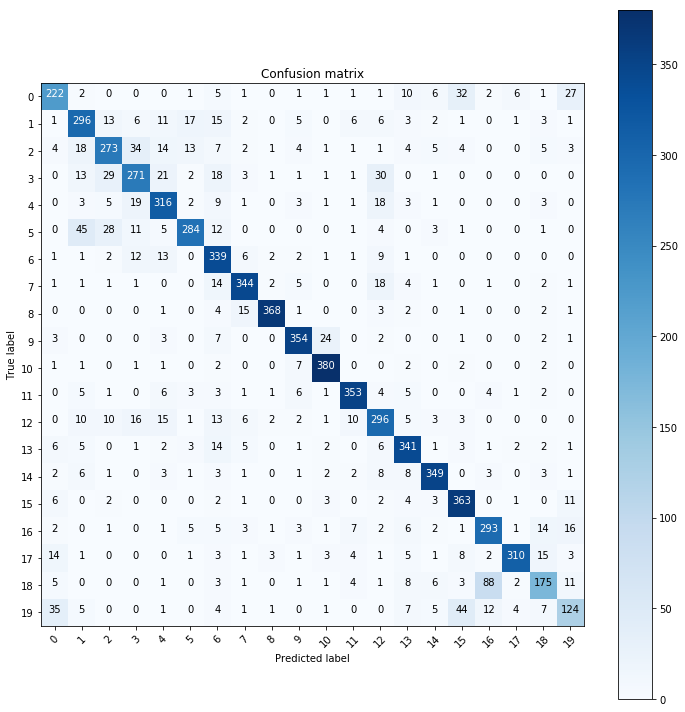

In [83]:
plt.figure(figsize=(10,10))
pcm.plot_confusion_matrix(my_cm,np.unique(pred).astype(int))
plt.savefig('cm.pdf')

In [89]:
i = 0
for s in dataset_test.target_names:
    print("\\hline")
    print(str(i) +'&' +s + '\\\\')

    i +=1

\hline
0&alt.atheism\\
\hline
1&comp.graphics\\
\hline
2&comp.os.ms-windows.misc\\
\hline
3&comp.sys.ibm.pc.hardware\\
\hline
4&comp.sys.mac.hardware\\
\hline
5&comp.windows.x\\
\hline
6&misc.forsale\\
\hline
7&rec.autos\\
\hline
8&rec.motorcycles\\
\hline
9&rec.sport.baseball\\
\hline
10&rec.sport.hockey\\
\hline
11&sci.crypt\\
\hline
12&sci.electronics\\
\hline
13&sci.med\\
\hline
14&sci.space\\
\hline
15&soc.religion.christian\\
\hline
16&talk.politics.guns\\
\hline
17&talk.politics.mideast\\
\hline
18&talk.politics.misc\\
\hline
19&talk.religion.misc\\


## Experiement 10
________________________

In [49]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
import optimization as o
import re
import scipy.sparse as sparse
from sklearn.feature_extraction.text import TfidfTransformer
dataset = fetch_20newsgroups(subset='train',remove=('headers', 'footers' 'quotes'),
                             shuffle=True, random_state=42)
reg = re.compile('[^a-zA-Z0-9 ]')

for i in range(0, len(dataset.data)):
    dataset.data[i] = dataset.data[i].lower()
    dataset.data[i] = reg.sub(' ', dataset.data[i])
    dataset.data[i] = re.sub(r'\s+',' ', dataset.data[i])

In [50]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
import optimization as o
import re
dataset_test = fetch_20newsgroups(subset='test',remove=('headers', 'footers' 'quotes'),
                             shuffle=True, random_state=42)
reg = re.compile('[^a-zA-Z0-9 ]')

for i in range(0, len(dataset_test.data)):
    dataset_test.data[i] = dataset_test.data[i].lower()
    dataset_test.data[i] = reg.sub(' ', dataset_test.data[i])
    dataset_test.data[i] = re.sub(r'\s+',' ', dataset_test.data[i])

In [51]:
from nltk import WordNetLemmatizer
import nltk
lemmatizer = WordNetLemmatizer()


In [19]:
from nltk import wordnet
def get_wordnet_pos(treebank_tag):
    my_switch = {'J':wordnet.wordnet.ADJ,
    'V':wordnet.wordnet.VERB,
    'N':wordnet.wordnet.NOUN,
    'R':wordnet.wordnet.ADV}
    for key, item in my_switch.items():
        if treebank_tag.startswith(key):
             return item
    return wordnet.wordnet.NOUN
from nltk import WordNetLemmatizer
def simple_lemmatizer(sentence, lemmatizer):
    tokenized_sent = sentence.split()
    pos_taged = [(word, get_wordnet_pos(tag)) for word, tag in nltk.pos_tag(tokenized_sent)]
    return " ".join([lemmatizer.lemmatize(word, tag) for word, tag in pos_taged])

In [52]:
import time as t
time_lem_data = t.time()
for i in range(0, len(dataset.data)):
    dataset.data[i] = simple_lemmatizer(dataset.data[i], lemmatizer)
time_lem_data = t.time() - time_lem_data 
print(time_lem_data)

460.5855722427368


In [53]:
time_lem_test = t.time()
for i in range(0, len(dataset_test.data)):
    dataset_test.data[i] = simple_lemmatizer(dataset_test.data[i], lemmatizer)
time_lem_test = t.time() - time_lem_test
print(time_lem_test)

286.0106828212738


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectoriz = CountVectorizer()
t0 = t.time()
data = vectoriz.fit_transform(dataset.data)
vocabulary = vectoriz.vocabulary_
target = dataset.target
TFIDF = TfidfTransformer()
data = TFIDF.fit_transform(data)
data = sparse.hstack((np.ones((data.shape[0], 1)), data), 'csr')
Best_cl = o.SGDClassifier('multinomial_logistic', step_alpha=10, batch_size=100,
                                  step_beta=0, max_iter=3000, l2_coef=1e-5, tolerance=1e-5)
time_fit = t.time()
Best_cl.fit(data, target)
time_fit = t.time() - time_fit
print("Время обучения-",time_fit, "Размер признакового пространства-", data.shape)

Время обучения- 370.7752687931061 Размер признакового пространства- (11314, 113260)


In [30]:
test = vectoriz.transform(dataset_test.data)
test = TFIDF.transform(test)
test = sparse.hstack((np.ones((test.shape[0], 1)), test), 'csr')
time_pred = t.time()
pred = Best_cl.predict(test)
time_pred = t.time() - time_pred
print("time predict", time_pred)

time predict 0.04800701141357422


In [31]:
(pred == dataset_test.target).sum() / dataset_test.target.shape[0]

0.7992565055762082

In [54]:
dataset.data[0]

'i be wonder if anyone out there could enlighten me on this car i saw the other day it be a 2 door sport car look to be from the late 60 early 70 it be call a bricklin the door be really small in addition the front bumper be separate from the rest of the body this be all i know if anyone can tellme a model name engine spec year of production where this car be make history or whatever info you have on this funky look car please e mail thanks il bring to you by your neighborhood lerxst'

In [55]:
%telepyth 'done'

'done'

### Stemming
_____________________________

In [32]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
import optimization as o
import re
import scipy.sparse as sparse
from sklearn.feature_extraction.text import TfidfTransformer
dataset = fetch_20newsgroups(subset='train',remove=('headers', 'footers' 'quotes'),
                             shuffle=True, random_state=42)
reg = re.compile('[^a-zA-Z0-9 ]')

for i in range(0, len(dataset.data)):
    dataset.data[i] = dataset.data[i].lower()
    dataset.data[i] = reg.sub(' ', dataset.data[i])
    dataset.data[i] = re.sub(r'\s+',' ', dataset.data[i])
    

In [33]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
import optimization as o
import re
dataset_test = fetch_20newsgroups(subset='test',remove=('headers', 'footers' 'quotes'),
                             shuffle=True, random_state=42)
reg = re.compile('[^a-zA-Z0-9 ]')

for i in range(0, len(dataset_test.data)):
    dataset_test.data[i] = dataset_test.data[i].lower()
    dataset_test.data[i] = reg.sub(' ', dataset_test.data[i])
    dataset_test.data[i] = re.sub(r'\s+',' ', dataset_test.data[i])

In [34]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='english')
def simple_stemmer(sent):
    sentence = sent.split()
    return " ".join([stemmer.stem(word) for word in sentence])

In [35]:
dataset.data[0]

' i was wondering if anyone out there could enlighten me on this car i saw the other day it was a 2 door sports car looked to be from the late 60s early 70s it was called a bricklin the doors were really small in addition the front bumper was separate from the rest of the body this is all i know if anyone can tellme a model name engine specs years of production where this car is made history or whatever info you have on this funky looking car please e mail thanks il brought to you by your neighborhood lerxst '

In [36]:
simple_stemmer(dataset.data[0])

'i was wonder if anyon out there could enlighten me on this car i saw the other day it was a 2 door sport car look to be from the late 60s earli 70s it was call a bricklin the door were realli small in addit the front bumper was separ from the rest of the bodi this is all i know if anyon can tellm a model name engin spec year of product where this car is made histori or whatev info you have on this funki look car pleas e mail thank il brought to you by your neighborhood lerxst'

In [37]:
import time as t
time_st_data = t.time()
for i in range(0, len(dataset.data)):
    dataset.data[i] = simple_stemmer(dataset.data[i])
time_st_data = t.time() - time_st_data 
print(time_st_data)

46.948967695236206


In [38]:
time_st_test = t.time()
for i in range(0, len(dataset_test.data)):
    dataset_test.data[i] = simple_stemmer(dataset_test.data[i])
time_st_test = t.time() - time_st_test
print(time_lem_test) ##Опечатка см ниже

288.9051170349121


In [39]:
print('time_st_test', time_st_test)

time_st_test 30.103819608688354


In [40]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectoriz = CountVectorizer()
t0 = t.time()
data = vectoriz.fit_transform(dataset.data)
vocabulary = vectoriz.vocabulary_
target = dataset.target
TFIDF = TfidfTransformer()
data = TFIDF.fit_transform(data)
data = sparse.hstack((np.ones((data.shape[0], 1)), data), 'csr')
Best_cl = o.SGDClassifier('multinomial_logistic', step_alpha=10, batch_size=100,
                                  step_beta=0, max_iter=3000, l2_coef=1e-5, tolerance=1e-5)
time_fit = t.time()
Best_cl.fit(data, target)
time_fit = t.time() - time_fit
print("Время обучения-",time_fit, "Размер признакового пространства-", data.shape)

Время обучения- 347.7361981868744 Размер признакового пространства- (11314, 102833)


In [43]:
test = vectoriz.transform(dataset_test.data)
test = TFIDF.transform(test)
test = sparse.hstack((np.ones((test.shape[0], 1)), test), 'csr')
time_pred = t.time()
pred = Best_cl.predict(test)
time_pred = t.time() - time_pred
print("time predict", time_pred)

time predict 0.048044443130493164


In [44]:
(pred == dataset_test.target).sum() / dataset_test.target.shape[0]

0.8044344131704726

## Experiement 11
_____________________________

In [73]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
import optimization as o
import re
import scipy.sparse as sparse
from sklearn.feature_extraction.text import TfidfTransformer
dataset = fetch_20newsgroups(subset='train',remove=('headers', 'footers' 'quotes'),
                             shuffle=True, random_state=42)
reg = re.compile('[^a-zA-Z0-9 ]')

for i in range(0, len(dataset.data)):
    dataset.data[i] = dataset.data[i].lower()
    dataset.data[i] = reg.sub(' ', dataset.data[i])
    dataset.data[i] = re.sub(r'\s+',' ', dataset.data[i])
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectoriz = CountVectorizer(max_df=0.15)
vectoriz.fit_transform(dataset.data)

<11314x121481 sparse matrix of type '<class 'numpy.int64'>'
	with 1188327 stored elements in Compressed Sparse Row format>

In [74]:
vectoriz.stop_words_

{'about',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'anyone',
 'are',
 'article',
 'as',
 'at',
 'be',
 'because',
 'been',
 'but',
 'by',
 'can',
 'com',
 'could',
 'do',
 'does',
 'don',
 'edu',
 'even',
 'first',
 'for',
 'from',
 'get',
 'good',
 'had',
 'has',
 'have',
 'he',
 'here',
 'his',
 'how',
 'if',
 'in',
 'into',
 'is',
 'it',
 'just',
 'know',
 'like',
 'make',
 'many',
 'may',
 'me',
 'more',
 'most',
 'much',
 'my',
 'new',
 'no',
 'not',
 'now',
 'of',
 'on',
 'one',
 'only',
 'or',
 'other',
 'out',
 'people',
 'see',
 'should',
 'so',
 'some',
 'such',
 'than',
 'thanks',
 'that',
 'the',
 'their',
 'them',
 'then',
 'there',
 'these',
 'they',
 'think',
 'this',
 'those',
 'time',
 'to',
 'two',
 'up',
 'use',
 've',
 'very',
 'want',
 'was',
 'way',
 'we',
 'well',
 'were',
 'what',
 'when',
 'where',
 'which',
 'who',
 'why',
 'will',
 'with',
 'would',
 'writes',
 'you',
 'your'}

In [76]:
len(vectoriz.stop_words_)

108

In [75]:
for i in np.unique(dataset.target):
    print(i,":", (dataset.target == i).sum()/dataset.target.shape[0])

0 : 0.0424253137705
1 : 0.0516174650875
2 : 0.05223616758
3 : 0.0521477815096
4 : 0.0510871486654
5 : 0.0524129397207
6 : 0.0517058511579
7 : 0.0525013257911
8 : 0.0528548700725
9 : 0.0527664840021
10 : 0.0530316422132
11 : 0.0525897118614
12 : 0.05223616758
13 : 0.0525013257911
14 : 0.0524129397207
15 : 0.0529432561428
16 : 0.048258794414
17 : 0.0498497436804
18 : 0.0410995227152
19 : 0.033321548524


In [78]:
vectoriz = CountVectorizer(min_df=5/dataset.target.shape[0])
vectoriz.fit_transform(dataset.data)

<11314x24442 sparse matrix of type '<class 'numpy.int64'>'
	with 1458431 stored elements in Compressed Sparse Row format>

In [79]:
vectoriz.stop_words_

{'cbgv',
 'gohr',
 'droves',
 'dwilson',
 'zq6qm5',
 'paintings',
 'lani',
 'pfze',
 'cuff',
 'cj102',
 'soper',
 'bouknight',
 'fz3dy',
 'yf9f9f9',
 'acculogic',
 'ercikan',
 'nikkor',
 'opc',
 'diagonals',
 'jjh42',
 'remedied',
 '8geyw',
 'ng0fpkhf7',
 'ytpe',
 'boghosian',
 'guarentees',
 '1654',
 'cscucsy',
 'silencers',
 '5304',
 '779g9nbox',
 'wwh',
 'intravenously',
 'carlsbad',
 'mercerville',
 'l44',
 'chpp',
 'kcnx',
 '16mmzvm',
 '8wjju59a',
 'maniac',
 '13253',
 'merkun',
 'n0nzo',
 'cursed',
 'aptible',
 'hgi40',
 'vpp',
 'grantor',
 '200ths',
 'ibhety',
 'monographs',
 'criminological',
 '10553',
 'mtkgc',
 'pocorn',
 'stevedav',
 'cxd',
 'sugra',
 'bernhard',
 '25868',
 '48104',
 'situnayake',
 '3dij',
 'windowless',
 'c5oy0z',
 'nieves',
 'forgets',
 'strawbridge',
 'merrit',
 '74616',
 'cimrmc8',
 'f2lomhdax',
 '2tle',
 'northbound',
 'dout',
 '8pfj',
 'carport',
 '5494',
 'unforunate',
 'bf1',
 'bellyaching',
 'bglr6',
 'caked',
 'warheads',
 'dls',
 'pkjznkjz',
 '54e

In [80]:
len(vectoriz.stop_words_)

97147

In [108]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
import optimization as o
import re
import scipy.sparse as sparse
from sklearn.feature_extraction.text import TfidfTransformer
dataset = fetch_20newsgroups(subset='train',remove=('headers', 'footers' 'quotes'),
                             shuffle=True, random_state=42)
reg = re.compile('[^a-zA-Z0-9 ]')

for i in range(0, len(dataset.data)):
    dataset.data[i] = dataset.data[i].lower()
    dataset.data[i] = reg.sub(' ', dataset.data[i])
    dataset.data[i] = re.sub(r'\s+',' ', dataset.data[i])
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectoriz = CountVectorizer(max_df=0.15, min_df=5/dataset.target.shape[0])

In [109]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
import optimization as o
import re
dataset_test = fetch_20newsgroups(subset='test',remove=('headers', 'footers' 'quotes'),
                             shuffle=True, random_state=42)
reg = re.compile('[^a-zA-Z0-9 ]')

for i in range(0, len(dataset_test.data)):
    dataset_test.data[i] = dataset_test.data[i].lower()
    dataset_test.data[i] = reg.sub(' ', dataset_test.data[i])
    dataset_test.data[i] = re.sub(r'\s+',' ', dataset_test.data[i])

In [110]:
time_cut = t.time()
data = vectoriz.fit_transform(dataset.data)
time_cut = t.time() - time_cut
vocabulary = vectoriz.vocabulary_
target = dataset.target
TFIDF = TfidfTransformer()
data = TFIDF.fit_transform(data)
data = sparse.hstack((np.ones((data.shape[0], 1)), data), 'csr')
Best_cl = o.SGDClassifier('multinomial_logistic', step_alpha=10, batch_size=100,
                                  step_beta=0, max_iter=3000, l2_coef=1e-5, tolerance=1e-5)
time_fit = t.time()
Best_cl.fit(data, target)
time_fit = t.time() - time_fit
print("предобработка - ", time_cut, "Время обучения-",time_fit, "Размер признакового пространства-", data.shape)

предобработка -  3.2454116344451904 Время обучения- 81.08029985427856 Размер признакового пространства- (11314, 24335)


In [111]:
test = vectoriz.transform(dataset_test.data)
test = TFIDF.transform(test)
test = sparse.hstack((np.ones((test.shape[0], 1)), test), 'csr')
time_pred = t.time()
pred = Best_cl.predict(test)
time_pred = t.time() - time_pred
print("time predict", time_pred)

time predict 0.028003931045532227


In [112]:
(pred == dataset_test.target).sum() / dataset_test.target.shape[0]

0.80244291024960168

In [117]:
from nltk.corpus import stopwords
stopwords.words('english')
vectoriz = CountVectorizer(min_df=5/dataset.target.shape[0], stop_words=stopwords.words('english'))
dataset = fetch_20newsgroups(subset='train',remove=('headers', 'footers' 'quotes'),
                             shuffle=True, random_state=42)
reg = re.compile('[^a-zA-Z0-9 ]')

for i in range(0, len(dataset.data)):
    dataset.data[i] = dataset.data[i].lower()
    dataset.data[i] = reg.sub(' ', dataset.data[i])
    dataset.data[i] = re.sub(r'\s+',' ', dataset.data[i])

In [118]:
dataset_test = fetch_20newsgroups(subset='test',remove=('headers', 'footers' 'quotes'),
                             shuffle=True, random_state=42)
reg = re.compile('[^a-zA-Z0-9 ]')

for i in range(0, len(dataset_test.data)):
    dataset_test.data[i] = dataset_test.data[i].lower()
    dataset_test.data[i] = reg.sub(' ', dataset_test.data[i])
    dataset_test.data[i] = re.sub(r'\s+',' ', dataset_test.data[i])

In [119]:
time_cut = t.time()
data = vectoriz.fit_transform(dataset.data)
time_cut = t.time() - time_cut
vocabulary = vectoriz.vocabulary_
target = dataset.target
TFIDF = TfidfTransformer()
data = TFIDF.fit_transform(data)
data = sparse.hstack((np.ones((data.shape[0], 1)), data), 'csr')
Best_cl = o.SGDClassifier('multinomial_logistic', step_alpha=10, batch_size=100,
                                  step_beta=0, max_iter=3000, l2_coef=1e-5, tolerance=1e-5)
time_fit = t.time()
Best_cl.fit(data, target)
time_fit = t.time() - time_fit
print("предобработка - ", time_cut, "Время обучения-",time_fit, "Размер признакового пространства-", data.shape)

предобработка -  3.1163973808288574 Время обучения- 82.0714316368103 Размер признакового пространства- (11314, 24301)


In [120]:
test = vectoriz.transform(dataset_test.data)
test = TFIDF.transform(test)
test = sparse.hstack((np.ones((test.shape[0], 1)), test), 'csr')
time_pred = t.time()
pred = Best_cl.predict(test)
time_pred = t.time() - time_pred
print("time predict", time_pred)

time predict 0.02900385856628418


In [121]:
(pred == dataset_test.target).sum() / dataset_test.target.shape[0]

0.80363781200212425

## Experiement 12 (bonus)
_________________________________

In [124]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
import optimization as o
import re
import scipy.sparse as sparse
from sklearn.feature_extraction.text import TfidfTransformer
dataset = fetch_20newsgroups(subset='train',remove=('headers', 'footers' 'quotes'),
                             shuffle=True, random_state=42)
reg = re.compile('[^a-zA-Z0-9 ]')

for i in range(0, len(dataset.data)):
    dataset.data[i] = dataset.data[i].lower()
    dataset.data[i] = reg.sub(' ', dataset.data[i])
    dataset.data[i] = re.sub(r'\s+',' ', dataset.data[i])
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
dataset_test = fetch_20newsgroups(subset='test',remove=('headers', 'footers' 'quotes'),
                             shuffle=True, random_state=42)
reg = re.compile('[^a-zA-Z0-9 ]')

for i in range(0, len(dataset_test.data)):
    dataset_test.data[i] = dataset_test.data[i].lower()
    dataset_test.data[i] = reg.sub(' ', dataset_test.data[i])
    dataset_test.data[i] = re.sub(r'\s+',' ', dataset_test.data[i])

In [127]:
size = {}
time_fit = {}
time_transform = {}
acc = {}
for n in [2, 3, 4]:
    vectoriz = CountVectorizer(ngram_range=(1,n), 
                               min_df=5/dataset.target.shape[0], stop_words=stopwords.words('english'))
    time_cut = t.time()
    data = vectoriz.fit_transform(dataset.data)
    time_transform[n] = t.time() - time_cut
    target = dataset.target
    TFIDF = TfidfTransformer()
    data = TFIDF.fit_transform(data)
    data = sparse.hstack((np.ones((data.shape[0], 1)), data), 'csr')
    Best_cl = o.SGDClassifier('multinomial_logistic', step_alpha=10, batch_size=100,
                                      step_beta=0, max_iter=3000, l2_coef=1e-5, tolerance=1e-5)
    time_f = t.time()
    Best_cl.fit(data, target)
    time_fit[n] = t.time() - time_f
    size[n] = data.shape[1]
    test = vectoriz.transform(dataset_test.data)
    test = TFIDF.transform(test)
    test = sparse.hstack((np.ones((test.shape[0], 1)), test), 'csr')
    time_pred = t.time()
    pred = Best_cl.predict(test)
    acc[n] = (pred == dataset_test.target).sum() / dataset_test.target.shape[0]

In [128]:
%telepyth 'done'

'done'

In [134]:
for n in [2,3,4]:
    print(str(n) + '&' +str(int(time_transform[n]))+ '&' +str(int(time_fit[n]))+ '&' +str(size[n])+ '&' +str(acc[n])+'\\\\')
    print("\\hline")

2&9&213&59995&0.808417419012\\
\hline
3&18&269&76971&0.807620817844\\
\hline
4&27&316&91297&0.806824216676\\
\hline


{2: 0.80841741901221453, 3: 0.80762081784386619, 4: 0.80682421667551774}